## EDA and Feature Engineering for ML model

In [78]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandasql

#Importing sclaers and encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
 
#Importing classifiers    
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

# Importing regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV

#Importing cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score 



In [14]:
#importng data_set
driver_data = pd.read_csv('Dataset/ACR_Data.csv')
driver_data.tail()

,Unnamed: 0,driver_id,day_of_week,total_days,Hour,Minute,passenger_id,total_requests,total_assigned,avg_rating,completed_rides,ACR,status,ride_duration_hour,total_distance_covered_km,avg_fare
2770,2993,2928430,3,1,15,21,5078476,5,10,4.000000,2,0.200000,COMPLETED,0.858056,12.975,133.0
2771,2994,2927864,5,1,13,3,5162511,5,6,3.750000,5,0.833333,COMPLETED,1.215278,18.579,90.2
2772,2995,2927397,7,1,18,7,5442177,1,5,4.307564,1,0.200000,COMPLETED,0.577500,4.571,99.0
2773,2996,2925573,2,1,21,24,4568992,4,5,4.666667,4,0.800000,COMPLETED,0.478611,15.240,99.0
2774,2997,2904200,1,1,19,40,4962826,2,6,5.000000,1,0.166667,COMPLETED,0.291944,6.225,123.0


In [19]:
df_new = pd.DataFrame(driver_data)
df_new.head()

,Unnamed: 0,driver_id,day_of_week,total_days,Hour,Minute,passenger_id,total_requests,total_assigned,avg_rating,completed_rides,ACR,status,ride_duration_hour,total_distance_covered_km,avg_fare
0,0,5397054,7,7,15,57,4186644,64,91,4.233333,51,0.560440,COMPLETED,12.793611,201.456,92.392157
1,1,5397002,7,7,2,38,5110289,45,268,4.000000,27,0.100746,COMPLETED,7.282500,129.245,108.074074
2,2,5396999,3,7,22,12,5161336,54,223,4.388889,40,0.179372,COMPLETED,9.922778,185.126,105.600000
3,3,5396817,2,7,18,38,3043378,33,121,4.500000,19,0.157025,COMPLETED,5.076111,73.232,90.368421
4,4,5396502,5,7,19,38,4750805,65,196,4.608696,42,0.214286,COMPLETED,9.806944,209.125,112.166667


In [20]:
df_new.columns

Index(['Unnamed: 0', 'driver_id', 'day_of_week', 'total_days', 'Hour',
       'Minute', 'passenger_id', 'total_requests', 'total_assigned',
       'avg_rating', 'completed_rides', 'ACR', 'status', 'ride_duration_hour',
       'total_distance_covered_km', 'avg_fare'],
      dtype='object')

In [21]:
print(df_new.isnull().sum())

Unnamed: 0                   0
driver_id                    0
day_of_week                  0
total_days                   0
Hour                         0
Minute                       0
passenger_id                 0
total_requests               0
total_assigned               0
avg_rating                   0
completed_rides              0
ACR                          0
status                       0
ride_duration_hour           0
total_distance_covered_km    0
avg_fare                     0
dtype: int64


In [22]:
#df_new.mean()

In [8]:
# dropping the null rows
#df_new.dropna(subset = ["ride_duration_hour","total_distance_covered_km","undiscounted_fare"], inplace=True)
#df_new.head()

,Unnamed: 0,driver_id,ride_id,total_days,Hour,Minute,passenger_id,total_requests,total_assigned,avg_rating,completed_rides,ACR,status,ride_duration_hour,total_distance_covered_km,undiscounted_fare
0,0,2869204,78RD6L,5,16,21,5236165,47,99,4.571429,40,0.404040,COMPLETED,9.715278,169.602,93.0
2,2,2870173,78B3SO,6,17,14,4519887,49,285,4.250000,19,0.066667,COMPLETED,4.008889,71.020,61.0
3,3,2886584,7.97E+10,6,21,3,4851288,58,189,4.606061,53,0.280423,COMPLETED,12.563056,265.841,137.0
4,4,2894871,78BLRR,6,10,18,4945432,63,131,4.600000,37,0.282443,COMPLETED,10.338611,190.003,101.0
5,5,2894948,78G1S1,6,9,54,3490350,44,358,4.555556,33,0.092179,COMPLETED,10.275000,185.181,105.0


In [9]:
#df_new.to_csv("Dataset/test_clean.csv")


In [10]:
# Replacing null rating values is 0 where status is Completed

#df_new['avg_rating'] = df_new['avg_rating'].fillna(df_new['avg_rating'].mean()) 
#df_new.head()

,Unnamed: 0,driver_id,ride_id,total_days,Hour,Minute,passenger_id,total_requests,total_assigned,avg_rating,completed_rides,ACR,status,ride_duration_hour,total_distance_covered_km,undiscounted_fare
0,0,2869204,78RD6L,5,16,21,5236165,47,99,4.571429,40,0.404040,COMPLETED,9.715278,169.602,93.0
2,2,2870173,78B3SO,6,17,14,4519887,49,285,4.250000,19,0.066667,COMPLETED,4.008889,71.020,61.0
3,3,2886584,7.97E+10,6,21,3,4851288,58,189,4.606061,53,0.280423,COMPLETED,12.563056,265.841,137.0
4,4,2894871,78BLRR,6,10,18,4945432,63,131,4.600000,37,0.282443,COMPLETED,10.338611,190.003,101.0
5,5,2894948,78G1S1,6,9,54,3490350,44,358,4.555556,33,0.092179,COMPLETED,10.275000,185.181,105.0


In [23]:
# Convert categorical 'status' column to numerical data with Label Encoder
le = LabelEncoder()
df_new['status'] = le.fit_transform(df_new['status'])
df_new

,Unnamed: 0,driver_id,day_of_week,total_days,Hour,Minute,passenger_id,total_requests,total_assigned,avg_rating,completed_rides,ACR,status,ride_duration_hour,total_distance_covered_km,avg_fare
0,0,5397054,7,7,15,57,4186644,64,91,4.233333,51,0.560440,1,12.793611,201.456,92.392157
1,1,5397002,7,7,2,38,5110289,45,268,4.000000,27,0.100746,1,7.282500,129.245,108.074074
2,2,5396999,3,7,22,12,5161336,54,223,4.388889,40,0.179372,1,9.922778,185.126,105.600000
3,3,5396817,2,7,18,38,3043378,33,121,4.500000,19,0.157025,1,5.076111,73.232,90.368421
4,4,5396502,5,7,19,38,4750805,65,196,4.608696,42,0.214286,1,9.806944,209.125,112.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2993,2928430,3,1,15,21,5078476,5,10,4.000000,2,0.200000,1,0.858056,12.975,133.000000
2771,2994,2927864,5,1,13,3,5162511,5,6,3.750000,5,0.833333,1,1.215278,18.579,90.200000
2772,2995,2927397,7,1,18,7,5442177,1,5,4.307564,1,0.200000,1,0.577500,4.571,99.000000
2773,2996,2925573,2,1,21,24,4568992,4,5,4.666667,4,0.800000,1,0.478611,15.240,99.000000


## Feature Engineering

In [24]:
# Calculating total abandoned trips
df_new['abandoned_trips'] = df_new['total_assigned'] - df_new['total_requests']
df_new

,Unnamed: 0,driver_id,day_of_week,total_days,Hour,Minute,passenger_id,total_requests,total_assigned,avg_rating,completed_rides,ACR,status,ride_duration_hour,total_distance_covered_km,avg_fare,abandoned_trips
0,0,5397054,7,7,15,57,4186644,64,91,4.233333,51,0.560440,1,12.793611,201.456,92.392157,27
1,1,5397002,7,7,2,38,5110289,45,268,4.000000,27,0.100746,1,7.282500,129.245,108.074074,223
2,2,5396999,3,7,22,12,5161336,54,223,4.388889,40,0.179372,1,9.922778,185.126,105.600000,169
3,3,5396817,2,7,18,38,3043378,33,121,4.500000,19,0.157025,1,5.076111,73.232,90.368421,88
4,4,5396502,5,7,19,38,4750805,65,196,4.608696,42,0.214286,1,9.806944,209.125,112.166667,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2993,2928430,3,1,15,21,5078476,5,10,4.000000,2,0.200000,1,0.858056,12.975,133.000000,5
2771,2994,2927864,5,1,13,3,5162511,5,6,3.750000,5,0.833333,1,1.215278,18.579,90.200000,1
2772,2995,2927397,7,1,18,7,5442177,1,5,4.307564,1,0.200000,1,0.577500,4.571,99.000000,4
2773,2996,2925573,2,1,21,24,4568992,4,5,4.666667,4,0.800000,1,0.478611,15.240,99.000000,1


In [25]:
df_new['% completed_rides'] = df_new['completed_rides'] / df_new['total_requests'] * 100
df_new

,Unnamed: 0,driver_id,day_of_week,total_days,Hour,Minute,passenger_id,total_requests,total_assigned,avg_rating,completed_rides,ACR,status,ride_duration_hour,total_distance_covered_km,avg_fare,abandoned_trips,% completed_rides
0,0,5397054,7,7,15,57,4186644,64,91,4.233333,51,0.560440,1,12.793611,201.456,92.392157,27,79.687500
1,1,5397002,7,7,2,38,5110289,45,268,4.000000,27,0.100746,1,7.282500,129.245,108.074074,223,60.000000
2,2,5396999,3,7,22,12,5161336,54,223,4.388889,40,0.179372,1,9.922778,185.126,105.600000,169,74.074074
3,3,5396817,2,7,18,38,3043378,33,121,4.500000,19,0.157025,1,5.076111,73.232,90.368421,88,57.575758
4,4,5396502,5,7,19,38,4750805,65,196,4.608696,42,0.214286,1,9.806944,209.125,112.166667,131,64.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2993,2928430,3,1,15,21,5078476,5,10,4.000000,2,0.200000,1,0.858056,12.975,133.000000,5,40.000000
2771,2994,2927864,5,1,13,3,5162511,5,6,3.750000,5,0.833333,1,1.215278,18.579,90.200000,1,100.000000
2772,2995,2927397,7,1,18,7,5442177,1,5,4.307564,1,0.200000,1,0.577500,4.571,99.000000,4,100.000000
2773,2996,2925573,2,1,21,24,4568992,4,5,4.666667,4,0.800000,1,0.478611,15.240,99.000000,1,100.000000


In [26]:
# Calculating canceled trips
df_new['canceled_rides'] = df_new['total_requests'] - df_new['completed_rides']
df_new

,Unnamed: 0,driver_id,day_of_week,total_days,Hour,Minute,passenger_id,total_requests,total_assigned,avg_rating,completed_rides,ACR,status,ride_duration_hour,total_distance_covered_km,avg_fare,abandoned_trips,% completed_rides,canceled_rides
0,0,5397054,7,7,15,57,4186644,64,91,4.233333,51,0.560440,1,12.793611,201.456,92.392157,27,79.687500,13
1,1,5397002,7,7,2,38,5110289,45,268,4.000000,27,0.100746,1,7.282500,129.245,108.074074,223,60.000000,18
2,2,5396999,3,7,22,12,5161336,54,223,4.388889,40,0.179372,1,9.922778,185.126,105.600000,169,74.074074,14
3,3,5396817,2,7,18,38,3043378,33,121,4.500000,19,0.157025,1,5.076111,73.232,90.368421,88,57.575758,14
4,4,5396502,5,7,19,38,4750805,65,196,4.608696,42,0.214286,1,9.806944,209.125,112.166667,131,64.615385,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2993,2928430,3,1,15,21,5078476,5,10,4.000000,2,0.200000,1,0.858056,12.975,133.000000,5,40.000000,3
2771,2994,2927864,5,1,13,3,5162511,5,6,3.750000,5,0.833333,1,1.215278,18.579,90.200000,1,100.000000,0
2772,2995,2927397,7,1,18,7,5442177,1,5,4.307564,1,0.200000,1,0.577500,4.571,99.000000,4,100.000000,0
2773,2996,2925573,2,1,21,24,4568992,4,5,4.666667,4,0.800000,1,0.478611,15.240,99.000000,1,100.000000,0


In [27]:
df_new['completed_rides'] = df_new['completed_rides'].astype(int)
df_new['total_requests'] = df_new['total_requests'].astype(int)
df_new['total_assigned'] = df_new['total_assigned'].astype(int)

df_new['abandoned_trips'] = df_new['abandoned_trips'].astype(int)
df_new['canceled_rides'] = df_new['canceled_rides'].astype(int)
#df_new.pop('status')


In [28]:
df_new.pop('Unnamed: 0')
df_new.dtypes

driver_id                      int64
day_of_week                    int64
total_days                     int64
Hour                           int64
Minute                         int64
passenger_id                   int64
total_requests                 int32
total_assigned                 int32
avg_rating                   float64
completed_rides                int32
ACR                          float64
status                         int32
ride_duration_hour           float64
total_distance_covered_km    float64
avg_fare                     float64
abandoned_trips                int32
% completed_rides            float64
canceled_rides                 int32
dtype: object

In [29]:
df_new.to_csv('Dataset/New_feature.csv')

## Feature Selection

In this part we will try to select the best features available for our model.

In [31]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_new.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

<Figure size 864x720 with 0 Axes>

In [32]:
#Correlation with output variable
cor_target = abs(cor["completed_rides"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

total_days                   0.690317
total_requests               0.930159
total_assigned               0.610410
completed_rides              1.000000
total_distance_covered_km    0.972466
canceled_rides               0.573152
Name: completed_rides, dtype: float64

## ML Modeling with the new aggregated dataset

In [33]:
X = df_new.drop(['driver_id','passenger_id','Minute','Hour','day_of_week','status','completed_rides'],axis=1)
#X = df_new[['total_days','total_requests','total_assigned','avg_rating','ACR']]
y = df_new.completed_rides.values 

In [34]:
X.columns

Index(['total_days', 'total_requests', 'total_assigned', 'avg_rating', 'ACR',
       'ride_duration_hour', 'total_distance_covered_km', 'avg_fare',
       'abandoned_trips', '% completed_rides', 'canceled_rides'],
      dtype='object')

In [35]:
df_new.columns

Index(['driver_id', 'day_of_week', 'total_days', 'Hour', 'Minute',
       'passenger_id', 'total_requests', 'total_assigned', 'avg_rating',
       'completed_rides', 'ACR', 'status', 'ride_duration_hour',
       'total_distance_covered_km', 'avg_fare', 'abandoned_trips',
       '% completed_rides', 'canceled_rides'],
      dtype='object')

In [36]:
X_scaled =  StandardScaler().fit_transform(X) 

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size=0.20, random_state=42)

In [38]:
regressor = RandomForestRegressor(n_estimators=1000)
 
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [39]:
# make prediction 
preds = regressor.predict(X_valid) 


In [40]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds))
#print(np.square(np.subtract(y_valid,preds)).mean())
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds)))
print(f"r2 Score Of Test Set : {r2_score(y_valid, preds)}")

Mean Absolute Error: 0.8826486486486487
Mean Squared Error: 4.0975922018018025
Root Mean Squared Error: 2.024251022428247
r2 Score Of Test Set : 0.9906377548473375


In [42]:
# make a single prediction
row = [30, 204, 250, 4.23,0.56,48.79,700.456,92.39,46,75.68750,30]
yhat = regressor.predict([row])
# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 131


#### Let's do some feature importance test in order to find out the best relevant features we need to use to get the best possible result. We will use extra_tree_classifier and random forest classifier for this part.

In [43]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 100,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)




In [44]:
print(feature_importance_normalized)

[0.03099308 0.05791712 0.03106425 0.00937312 0.02177999 0.02728728
 0.05739078 0.01059304 0.01471668 0.02004357 0.02394851]


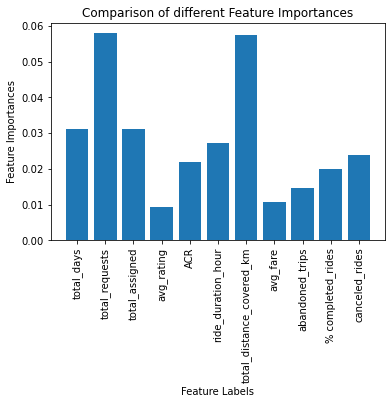

In [45]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation=90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [42]:
X.columns

Index(['total_days', 'total_requests', 'total_assigned', 'avg_rating', 'ACR',
       'ride_duration_hour', 'total_distance_covered_km', 'avg_fare',
       'abandoned_trips', '% completed_rides', 'canceled_rides'],
      dtype='object')

In [47]:
## With extra tree classifier we can see the feature importance chart. 
#Let's do this again with Random Forest Classifier in order to cross check 

In [48]:
#feature importance with random forest
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [49]:
feature_names = ['total_days', 'total_requests', 'total_assigned', 'avg_rating', 'ACR',
       'ride_duration_hour', 'total_distance_covered_km', 'avg_fare',
       'abandoned_trips', '% completed_rides', 'canceled_rides']

In [50]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

total_distance_covered_km    0.149769
total_requests               0.136847
ride_duration_hour           0.120455
avg_fare                     0.114085
% completed_rides            0.105664
ACR                          0.079403
total_assigned               0.070138
avg_rating                   0.064135
canceled_rides               0.061677
abandoned_trips              0.059737
total_days                   0.038091
dtype: float64

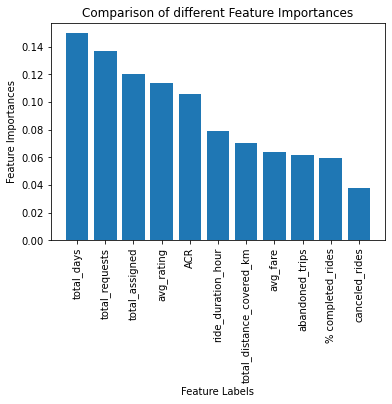

In [51]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_imp)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation=90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [52]:
#X = df_new.drop(['Hour','Minute','passenger_id','avg_rating','completed_rides'],axis=1)
X_new = df_new[['total_days','total_requests','total_assigned','avg_rating','ACR','ride_duration_hour', 'total_distance_covered_km','avg_fare','abandoned_trips', '% completed_rides', 'canceled_rides']]
 
y_new = df_new.completed_rides.values 

In [53]:
X_new.columns


Index(['total_days', 'total_requests', 'total_assigned', 'avg_rating', 'ACR',
       'ride_duration_hour', 'total_distance_covered_km', 'avg_fare',
       'abandoned_trips', '% completed_rides', 'canceled_rides'],
      dtype='object')

In [54]:
X_train_new, X_test, y_train_new, y_test = train_test_split(X_new,y_new,test_size=0.20, random_state=42)

In [55]:
regressor = RandomForestRegressor(n_estimators=1000)
 
regressor.fit(X_train_new,y_train_new)

RandomForestRegressor(n_estimators=1000)

In [56]:
# make prediction 
preds_new = regressor.predict(X_test) 


In [57]:
## Error calculation for Random Forest Regressor

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_new))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_new)))
print(f"r2 Score Of Test Set : {r2_score(y_test, preds_new)}")

Mean Absolute Error: 0.8759153153153153
Mean Squared Error: 4.017527263063064
Root Mean Squared Error: 2.004377026176229
r2 Score Of Test Set : 0.9908206885185494


In [58]:
# make a single prediction
row = [30, 204, 250, 4.23,0.56,48.79,700.456,92.39,46,75.68750,30]
yhat = regressor.predict([row])
# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 135


## Bayesian Ridge

In [60]:
# Creating and training model
model = BayesianRidge()
model.fit(X_train_new,y_train_new)
  
# Model making a prediction on test data
prediction = model.predict(X_test)
  


In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_new))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_new))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_new)))
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

Mean Absolute Error: 0.8759153153153153
Mean Squared Error: 4.017527263063064
Root Mean Squared Error: 2.004377026176229
r2 Score Of Test Set : 0.9999997876189897


In [62]:
# make a single prediction
row = [30, 204, 250, 4.23,0.56,48.79,700.456,92.39,46,75.68750,30]
yhat = model.predict([row])
# summarize prediction
print('Bayesian_Ridge_Prediction: %d' % yhat[0])

Bayesian_Ridge_Prediction: 174


### Gradient Boosting Regressor

In [65]:

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=42).fit(X_new, y_new)
gb.score(X_test, y_test)


0.9871400559107156

In [66]:
gb_prediction = gb.predict(X_test) 

In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gb_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gb_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gb_prediction)))
print(f"r2 Score Of Test Set : {r2_score(y_test, gb_prediction)}")

Mean Absolute Error: 1.8091275380858778
Mean Squared Error: 5.628436956799087
Root Mean Squared Error: 2.3724327085924033
r2 Score Of Test Set : 0.9871400559107156


In [68]:
# make a single prediction
row = [30, 204, 250, 4.23,0.56,48.79,700.456,92.39,46,75.68750,30]
yhat = gb.predict([row])
# summarize prediction
print('GB_Prediction: %d' % yhat[0])

GB_Prediction: 163


### XG Boost

In [71]:

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [72]:
xg_reg.fit(X_train_new,y_train_new)

xg_preds = xg_reg.predict(X_test)

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xg_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xg_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xg_preds)))
print(f"r2 Score Of Test Set : {r2_score(y_test, xg_preds)}")

Mean Absolute Error: 7.443351516637716
Mean Squared Error: 151.29695973046645
Root Mean Squared Error: 12.30028291261898
r2 Score Of Test Set : 0.654314251372726


## ADA Boost

In [74]:

ada = AdaBoostRegressor(n_estimators=250, random_state=42)
ada.fit(X_train_new, y_train_new)

AdaBoostRegressor(n_estimators=250, random_state=42)

In [81]:
# now let's predict the acccuracy
# make prediction 
ada_preds = ada.predict(X_test) 


In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_preds)))
# check performance# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, ada_preds)}")


Mean Absolute Error: 4.126014987975254
Mean Squared Error: 23.70358172944132
Root Mean Squared Error: 4.868632429075061
r2 Score Of Test Set : 0.9458416718360555


In [82]:
# make a single prediction
row = [30, 204, 250, 4.23,0.56,48.79,700.456,92.39,46,75.68750,30]
yhat = ada.predict([row])
# summarize prediction
print('ada_Prediction: %d' % yhat[0])

ada_Prediction: 155


### Decision Tree Regressor

In [79]:
# Create Decision Tree Regressor object
dt = DecisionTreeRegressor()

# Train Decision Tree Classifer
dt = dt.fit(X_train_new,y_train_new)

#Predict the response for test dataset
dt_preds = dt.predict(X_test)

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_preds)))
# check performance# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, dt_preds)}")


Mean Absolute Error: 1.3675675675675676
Mean Squared Error: 7.263063063063063
Root Mean Squared Error: 2.695007061783524
r2 Score Of Test Set : 0.9834052356587013


In [84]:
# make a single prediction
row = [30, 204, 250, 4.23,0.56,48.79,700.456,92.39,46,75.68750,30]
yhat = dt.predict([row])
# summarize prediction
print('DT_Prediction: %d' % yhat[0])

DT_Prediction: 155


## Model Comparison

In [85]:
models= [('random_forest', regressor), ('bayesian', model), ('gradient_boosting', gb),('ada', ada),('dt', dt)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train_new, y_train_new, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [86]:
#THIS IS FOR RF
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
RF_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
#RF_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
RF_MAE_mean = -results[1]['test_score'].mean()
#RF_MAE_std= results[1]['test_score'].std()
RF_r2_mean = results[2]['test_score'].mean()
#RF_r2_std = results[2]['test_score'].std()

#THIS IS FOR Bayesian Ridge
BR_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
#BR_RMSE_std= results[3]['test_score'].std()
BR_MAE_mean = -results[4]['test_score'].mean()
#BR_MAE_std= results[4]['test_score'].std()
BR_r2_mean = results[5]['test_score'].mean()
#BR_r2_std = results[5]['test_score'].std()

#THIS IS FOR GB
GB_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
#GB_RMSE_std= results[6]['test_score'].std()
GB_MAE_mean = -results[7]['test_score'].mean()
#GB_MAE_std= results[7]['test_score'].std()
GB_r2_mean = results[8]['test_score'].mean()
#GB_r2_std = results[8]['test_score'].std()

#THIS IS FOR ADA
ADA_RMSE_mean = np.sqrt(-results[9]['test_score'].mean())
#ADA_RMSE_std= results[9]['test_score'].std()
ADA_MAE_mean = -results[10]['test_score'].mean()
#ADA_MAE_std= results[10]['test_score'].std()
ADA_r2_mean = results[11]['test_score'].mean()
#ADA_r2_std = results[11]['test_score'].std()
#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[12]['test_score'].mean())
#DT_RMSE_std= results[12]['test_score'].std()
DT_MAE_mean = -results[13]['test_score'].mean()
#DT_MAE_std= results[13]['test_score'].std()
DT_r2_mean = results[14]['test_score'].mean()
#DT_r2_std = results[14]['test_score'].std()

In [87]:
modelDF = pd.DataFrame({
    'Model'       : ['Random Forest','Bayesian Ridge','Gradient Boosting','ADA Boosting', 'Decision Trees'],
    'RMSE_mean'    : [RF_RMSE_mean, BR_RMSE_mean, GB_RMSE_mean,ADA_RMSE_mean,DT_RMSE_mean],
    #'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [RF_MAE_mean, BR_MAE_mean ,GB_MAE_mean ,ADA_MAE_mean,DT_MAE_mean],
    #'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [RF_r2_mean, BR_r2_mean, GB_r2_mean, ADA_r2_mean,DT_r2_mean],
    #'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean',  'MAE_mean', 'r2_mean'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,MAE_mean,r2_mean
1,Bayesian Ridge,0.489408,0.177341,0.999472
0,Random Forest,2.109105,0.931250,0.989783
2,Gradient Boosting,3.095006,2.086025,0.976820
4,Decision Trees,3.277483,1.473874,0.975308
3,ADA Boosting,4.697643,3.917481,0.945889


## Result

### So we can see the comparison chart of these models, random forest is the best performing algorithm closely followed by bayesian ridge. We shall choose between two model for prediction.

# Reference

In [238]:
#Reference
#https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tuning#hyper

In [297]:
#https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

#https://hackernoon.com/automatic-feature-selection-in-python-an-essential-guide-uv3e37mk

#https://www.datacamp.com/community/tutorials/feature-selection-python

#https://towardsdatascience.com/feature-selection-using-logistic-regression-model-efc949569f58

#https://www.datacamp.com/community/tutorials/random-forests-classifier-python#

#https://www.datacamp.com/community/tutorials/decision-tree-classification-python

#https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tuning
#https://www.datacamp.com/community/tutorials/xgboost-in-python
